# Project 2: Cleaning and EDA
----

## Problem Statement

Build a predictive linear regression model for real estate company to help give the local Ames, Iowa property owner, an idea of how much their home will sell for using features that are easily determinable. 

### Data

* [`test.csv`](../datasets/test.csv): Unseen test data with no price information
* [`train.csv`](../datasets/train.csv): Raw training data to train model on
* [`train_clean.csv`](../datasets/train_clean.csv): The training data cleaned and engineered with new features
* [`sat_total_group.csv`](../datasets/kaggle_sub_1.csv): Predictions for testing data in format for kaggle competition

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns',40)

In [2]:
df = pd.read_csv('../datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,...,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,...,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,...,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,...,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,...,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Too many columns, going to sort through them and eliminate ones that are not easily defineable or don't have the impact we're looking for on our target, SalePrice

In [5]:
df.sort_values('SalePrice',ascending=False)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1671,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,...,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,611657
1964,1638,527216080,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,...,Fin,3.0,1110.0,Gd,TA,Y,0,135,0,0,322,0,NaN,NaN,NaN,0,6,2007,New,591587
1692,2451,528360050,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,...,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,NaN,NaN,NaN,0,5,2006,WD,584500
1796,434,528110090,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,...,RFn,3.0,1020.0,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,582933
151,2333,527212030,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,...,Fin,3.0,716.0,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,556581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,2881,911175430,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,...,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,35311
1292,2844,909101330,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,2,3,...,Unf,1.0,216.0,Fa,Fa,N,0,0,100,0,0,0,NaN,NaN,NaN,0,2,2006,ConLD,35000
1309,727,902477120,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,...,NaN,0.0,0.0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,34900
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,...,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100


In [6]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

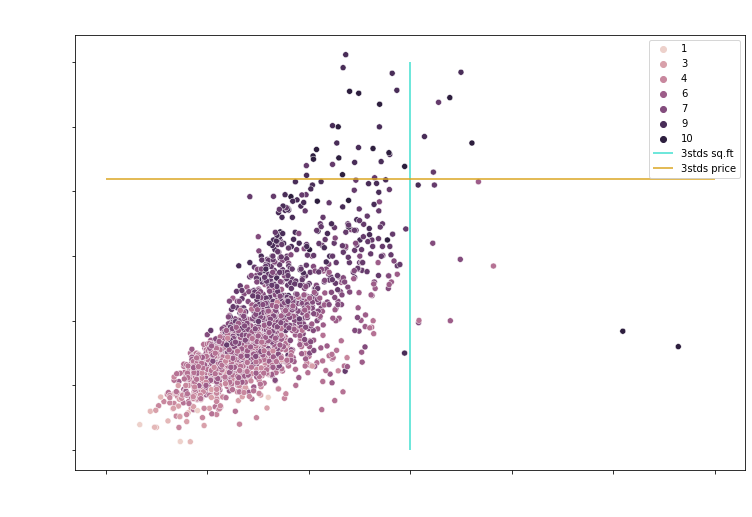

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice',hue= 'Overall Qual');
plt.vlines(df['Gr Liv Area'].mean()+df['Gr Liv Area'].std()*3,ymin=0, ymax=600000,color='turquoise',label='3stds sq.ft');
plt.hlines(df['SalePrice'].mean()+df['SalePrice'].std()*3 ,xmin=0,xmax=6000,color='goldenrod',label='3stds price');

plt.legend();
plt.title('Price vs. Sq. Ft by Overall Quality',size=28,color='white');
plt.xlabel('Liveable Sq. Ft',size=20,color='white');
plt.ylabel('Sale Price',size=20,color='white');
plt.tick_params(labelcolor='white',)

#plt.savefig('../base_sq_price.png');

It seems like Square footage is a pretty good indicator of price, as well as the Overall Quality feature. There are some major outliers that I'll remove though.

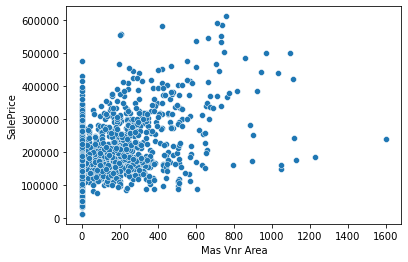

In [8]:
sns.scatterplot(data=df,x='Mas Vnr Area', y ='SalePrice');

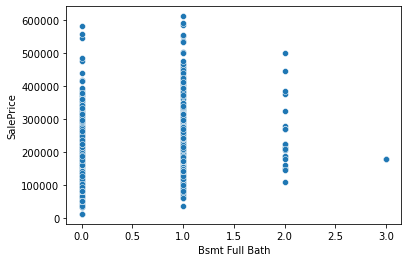

In [9]:
sns.scatterplot(data=df,x='Bsmt Full Bath', y ='SalePrice');

In [10]:
df.loc[df['Bsmt Full Bath']==3]['SalePrice'].mean()

179000.0

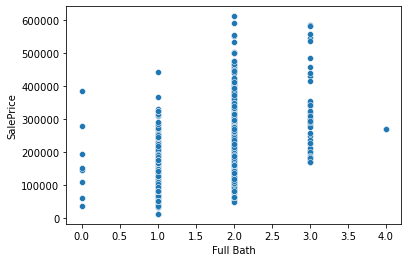

In [11]:
sns.scatterplot(data=df,x='Full Bath', y ='SalePrice');

Full Baths looks like another good indicator. But with only one house with 4 bathrooms, I will probably end up removing that data point.

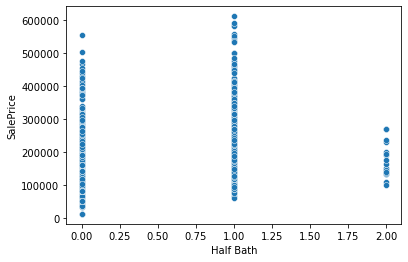

In [12]:
sns.scatterplot(data=df,x='Half Bath', y ='SalePrice');

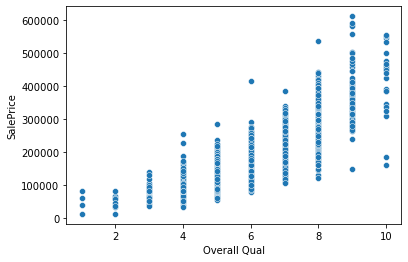

In [13]:
sns.scatterplot(data=df,x='Overall Qual', y ='SalePrice');

Confirming that Overall Quality is a good feature.

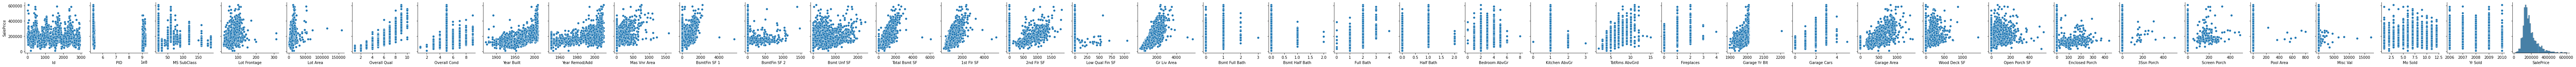

In [14]:
sns.pairplot(data=df,y_vars='SalePrice');

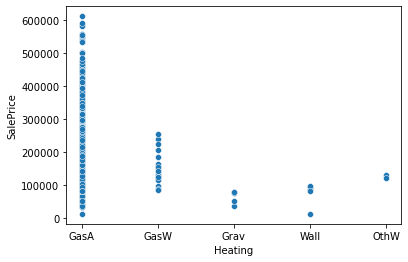

In [15]:
sns.scatterplot(data=df,x='Heating', y ='SalePrice');

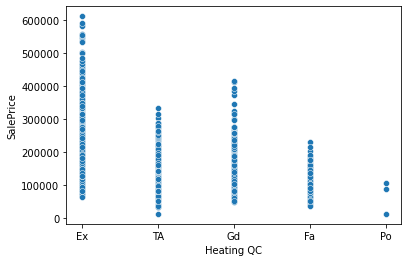

In [16]:
sns.scatterplot(data=df,x='Heating QC', y ='SalePrice');

What matters less than the type of heating is how efficient it is.

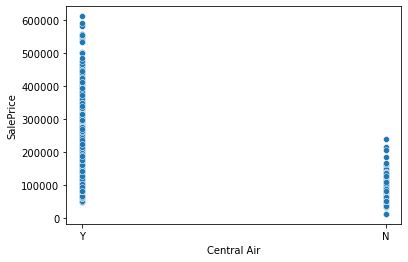

In [17]:
sns.scatterplot(data=df,x='Central Air', y ='SalePrice');

Another good simple feature to binarize.

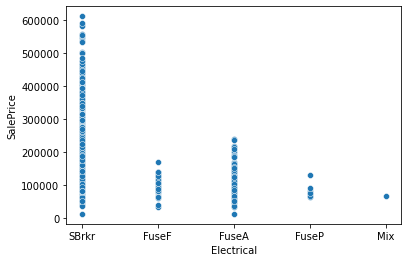

In [18]:
sns.scatterplot(data=df,x='Electrical', y ='SalePrice');

It looks ike it doesn't matter what your electrical grid is as long as it is standard circuit breakers or not.

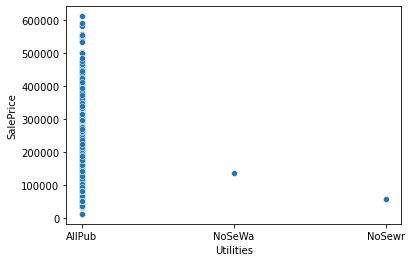

In [19]:
sns.scatterplot(data=df,x='Utilities', y ='SalePrice');

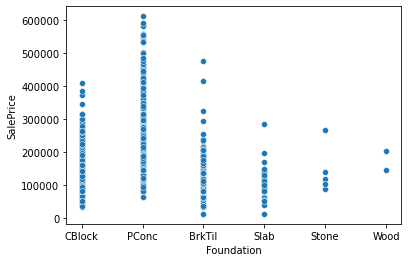

In [20]:
sns.scatterplot(data=df,x='Foundation', y ='SalePrice');

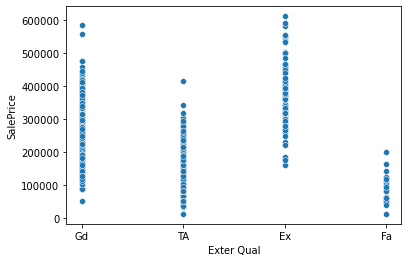

In [21]:
sns.scatterplot(data=df,x='Exter Qual', y ='SalePrice');

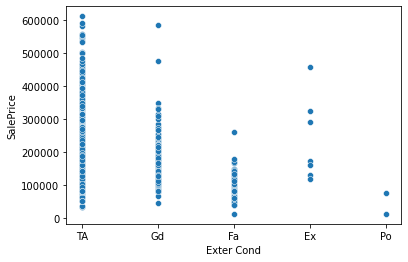

In [22]:
sns.scatterplot(data=df,x='Exter Cond', y ='SalePrice');

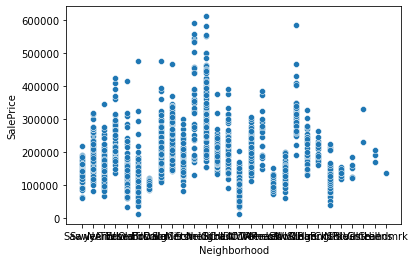

In [23]:
sns.scatterplot(data=df,x='Neighborhood', y ='SalePrice');

Location, location, location! Should find a way to simplify neighborhoods into a ranking system.

In [24]:
hoods = df.groupby('Neighborhood').agg({'SalePrice':'mean'})

In [25]:
hoods.sort_values('SalePrice',ascending=False)

,SalePrice
Neighborhood,
StoneBr,329675.736842
NridgHt,322831.352459
NoRidge,316294.125000
GrnHill,280000.000000
Veenker,253570.588235
Timber,241051.354167
Somerst,227183.900000
ClearCr,217490.074074
Crawfor,205901.211268


In [26]:
hoods['SalePrice'].mean()

187579.71007846566

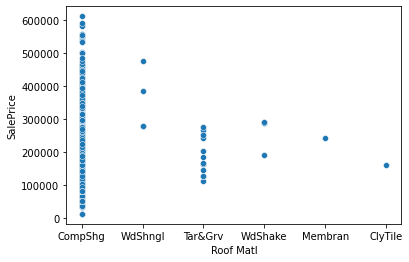

In [27]:
sns.scatterplot(data=df,x='Roof Matl', y ='SalePrice');

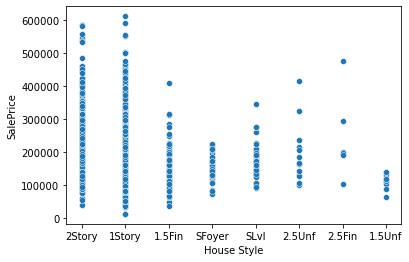

In [28]:
sns.scatterplot(data=df,x='House Style', y ='SalePrice');

In [29]:
df.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
Sale Type            0
Full Bath            0
Half Bath            0
dtype: int64

A lot of nulls here, some of these features aren't needed so I'll drop the column itself.

In [30]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [31]:
df_clean = df[['SalePrice','Overall Qual', 'Year Built',
               'Year Remod/Add','Yr Sold', 'Total Bsmt SF', '1st Flr SF',
               '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd',
               'Fireplaces','Garage Yr Blt','Garage Cars','Heating QC',
              'Central Air', 'Electrical','Foundation','House Style', 'Neighborhood', 'Exter Qual']]
df_clean.columns

Index(['SalePrice', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Yr Sold',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Heating QC', 'Central Air', 'Electrical', 'Foundation', 'House Style',
       'Neighborhood', 'Exter Qual'],
      dtype='object')

Narrowing down dataframe to some more managable and important features.

In [32]:
df_clean.head(10)

,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Heating QC,Central Air,Electrical,Foundation,House Style,Neighborhood,Exter Qual
0,130500,6,1976,2005,2010,725.0,725,754,1479,2,6,0,1976.0,2.0,Ex,Y,SBrkr,CBlock,2Story,Sawyer,Gd
1,220000,7,1996,1997,2009,913.0,913,1209,2122,2,8,1,1997.0,2.0,Ex,Y,SBrkr,PConc,2Story,SawyerW,Gd
2,109000,5,1953,2007,2010,1057.0,1057,0,1057,1,5,0,1953.0,1.0,TA,Y,SBrkr,CBlock,1Story,NAmes,TA
3,174000,5,2006,2007,2010,384.0,744,700,1444,2,7,0,2007.0,2.0,Gd,Y,SBrkr,PConc,2Story,Timber,TA
4,138500,6,1900,1993,2010,676.0,831,614,1445,2,6,0,1957.0,2.0,TA,Y,SBrkr,PConc,1.5Fin,SawyerW,TA
5,190000,6,1966,2002,2010,1517.0,1888,0,1888,2,6,1,1966.0,2.0,Ex,Y,SBrkr,CBlock,1Story,NAmes,Gd
6,140000,6,2005,2006,2006,547.0,1072,0,1072,2,5,0,2005.0,2.0,Gd,Y,SBrkr,PConc,SFoyer,Edwards,TA
7,142000,5,1959,1959,2010,1188.0,1188,0,1188,1,6,0,1959.0,2.0,Fa,Y,SBrkr,CBlock,1Story,NAmes,TA
8,112500,5,1952,1952,2007,924.0,924,0,924,1,6,0,1952.0,1.0,TA,Y,SBrkr,CBlock,1Story,OldTown,TA
9,135000,5,1969,1969,2007,1040.0,1040,1040,2080,1,9,2,1969.0,2.0,TA,Y,SBrkr,PConc,2Story,NAmes,TA


In [33]:
df_clean.isna().sum()

SalePrice           0
Overall Qual        0
Year Built          0
Year Remod/Add      0
Yr Sold             0
Total Bsmt SF       1
1st Flr SF          0
2nd Flr SF          0
Gr Liv Area         0
Full Bath           0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     114
Garage Cars         1
Heating QC          0
Central Air         0
Electrical          0
Foundation          0
House Style         0
Neighborhood        0
Exter Qual          0
dtype: int64

In [34]:
df_clean.sort_values('Total Bsmt SF',ascending=False).head(10)

,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Heating QC,Central Air,Electrical,Foundation,House Style,Neighborhood,Exter Qual
960,160000,10,2008,2008,2008,6110.0,4692,950,5642,2,12,3,2008.0,2.0,Ex,Y,SBrkr,PConc,2Story,Edwards,Ex
1885,183850,10,2008,2009,2007,5095.0,5095,0,5095,2,15,2,2008.0,3.0,Ex,Y,SBrkr,PConc,1Story,Edwards,Ex
1147,284000,8,2003,2004,2009,3206.0,1629,0,1629,2,7,1,2003.0,3.0,Ex,Y,SBrkr,PConc,1Story,NridgHt,Gd
328,430000,8,1992,1993,2007,3200.0,3228,0,3228,3,10,1,1992.0,2.0,Ex,Y,SBrkr,PConc,1Story,NoRidge,Gd
1164,555000,10,2008,2008,2009,3094.0,2402,0,2402,2,10,2,2008.0,3.0,Ex,Y,SBrkr,PConc,1Story,NridgHt,Ex
1227,500000,9,2003,2004,2010,2846.0,2696,0,2696,2,10,2,2003.0,3.0,Ex,Y,SBrkr,PConc,1Story,NridgHt,Ex
1964,591587,9,2006,2007,2007,2660.0,2338,0,2338,2,8,2,2005.0,3.0,Ex,Y,SBrkr,PConc,1Story,StoneBr,Ex
1117,466500,10,2001,2002,2007,2633.0,2633,0,2633,2,8,2,2001.0,3.0,Ex,Y,SBrkr,PConc,1Story,NoRidge,Ex
30,278000,8,1981,1981,2009,2524.0,2524,0,2524,2,9,1,1981.0,2.0,TA,Y,SBrkr,PConc,1Story,NWAmes,Gd
623,552000,10,2004,2005,2009,2492.0,2492,0,2492,2,8,1,2004.0,3.0,Ex,Y,SBrkr,PConc,1Story,NridgHt,Ex


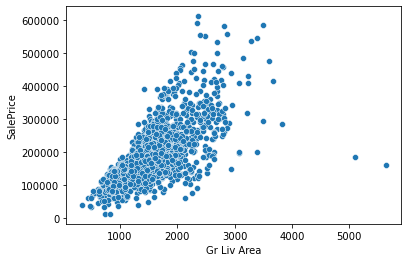

In [35]:
sns.scatterplot(data=df_clean,x='Gr Liv Area',y='SalePrice');

In [36]:
df_clean.sort_values('Gr Liv Area',ascending=False)

,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Heating QC,Central Air,Electrical,Foundation,House Style,Neighborhood,Exter Qual
960,160000,10,2008,2008,2008,6110.0,4692,950,5642,2,12,3,2008.0,2.0,Ex,Y,SBrkr,PConc,2Story,Edwards,Ex
1885,183850,10,2008,2009,2007,5095.0,5095,0,5095,2,15,2,2008.0,3.0,Ex,Y,SBrkr,PConc,1Story,Edwards,Ex
616,284700,5,1959,1996,2008,0.0,3820,0,3820,3,11,2,1959.0,2.0,TA,Y,SBrkr,Slab,1Story,Edwards,TA
1897,415000,6,1935,1990,2006,1836.0,1836,1836,3672,3,7,2,1993.0,2.0,Gd,Y,SBrkr,BrkTil,2.5Unf,Edwards,TA
1035,475000,10,1892,1993,2006,1107.0,1518,1518,3608,2,12,2,1993.0,3.0,Ex,Y,SBrkr,BrkTil,2.5Fin,OldTown,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,35000,2,1922,1955,2006,498.0,498,0,498,1,3,0,1922.0,1.0,TA,N,FuseF,BrkTil,1Story,Edwards,TA
1643,61500,3,1921,1950,2006,492.0,492,0,492,1,3,0,1921.0,1.0,TA,Y,SBrkr,BrkTil,1Story,OldTown,TA
1518,35311,2,1949,1950,2006,480.0,480,0,480,0,4,0,1958.0,1.0,TA,N,FuseA,CBlock,1Story,IDOTRR,TA
432,60000,2,1920,1950,2009,290.0,438,0,438,1,3,0,1930.0,1.0,TA,N,FuseF,CBlock,1Story,SWISU,TA


In [37]:
df_clean = df_clean.loc[df_clean['Gr Liv Area']<3819]

Dropping those far outliers, the data doesn't seem accurate. Or at least not representative of the rest of the data.

In [38]:
df_clean.shape

(2048, 21)

In [39]:
df_clean.sort_values('Gr Liv Area',ascending=False)

,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Heating QC,Central Air,Electrical,Foundation,House Style,Neighborhood,Exter Qual
1897,415000,6,1935,1990,2006,1836.0,1836,1836,3672,3,7,2,1993.0,2.0,Gd,Y,SBrkr,BrkTil,2.5Unf,Edwards,TA
1035,475000,10,1892,1993,2006,1107.0,1518,1518,3608,2,12,2,1993.0,3.0,Ex,Y,SBrkr,BrkTil,2.5Fin,OldTown,Gd
1692,584500,9,1993,1994,2006,1733.0,1933,1567,3500,3,11,1,1993.0,3.0,Ex,Y,SBrkr,PConc,2Story,NoRidge,Gd
1939,295000,7,1880,2002,2008,1470.0,1675,1818,3493,3,10,1,2003.0,3.0,Ex,Y,SBrkr,BrkTil,2.5Fin,OldTown,TA
858,200000,6,1914,1995,2007,1440.0,1440,1440,3395,2,14,0,NaN,0.0,Ex,Y,FuseA,CBlock,2.5Fin,SWISU,Fa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,35000,2,1922,1955,2006,498.0,498,0,498,1,3,0,1922.0,1.0,TA,N,FuseF,BrkTil,1Story,Edwards,TA
1643,61500,3,1921,1950,2006,492.0,492,0,492,1,3,0,1921.0,1.0,TA,Y,SBrkr,BrkTil,1Story,OldTown,TA
1518,35311,2,1949,1950,2006,480.0,480,0,480,0,4,0,1958.0,1.0,TA,N,FuseA,CBlock,1Story,IDOTRR,TA
432,60000,2,1920,1950,2009,290.0,438,0,438,1,3,0,1930.0,1.0,TA,N,FuseF,CBlock,1Story,SWISU,TA


In [40]:
1933 + 1567

3500

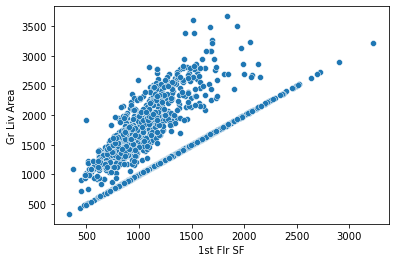

In [41]:
sns.scatterplot(data= df_clean,x='1st Flr SF', y='Gr Liv Area');

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='Gr Liv Area'>

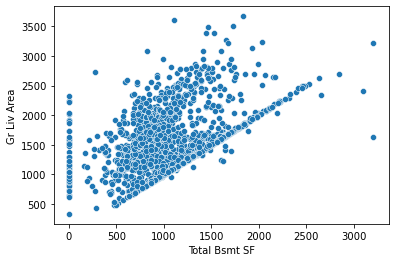

In [42]:
sns.scatterplot(data=df_clean,x='Total Bsmt SF',y='Gr Liv Area')

In [43]:
df_clean.drop(columns={'1st Flr SF','2nd Flr SF'})

,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Heating QC,Central Air,Electrical,Foundation,House Style,Neighborhood,Exter Qual
0,130500,6,1976,2005,2010,725.0,1479,2,6,0,1976.0,2.0,Ex,Y,SBrkr,CBlock,2Story,Sawyer,Gd
1,220000,7,1996,1997,2009,913.0,2122,2,8,1,1997.0,2.0,Ex,Y,SBrkr,PConc,2Story,SawyerW,Gd
2,109000,5,1953,2007,2010,1057.0,1057,1,5,0,1953.0,1.0,TA,Y,SBrkr,CBlock,1Story,NAmes,TA
3,174000,5,2006,2007,2010,384.0,1444,2,7,0,2007.0,2.0,Gd,Y,SBrkr,PConc,2Story,Timber,TA
4,138500,6,1900,1993,2010,676.0,1445,2,6,0,1957.0,2.0,TA,Y,SBrkr,PConc,1.5Fin,SawyerW,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,298751,8,2007,2007,2008,1884.0,1728,2,7,1,2007.0,2.0,Ex,Y,SBrkr,PConc,1Story,Timber,Gd
2047,82500,4,1940,1950,2009,861.0,861,1,4,0,1961.0,2.0,Ex,Y,SBrkr,CBlock,1Story,Edwards,TA
2048,177000,6,1928,1950,2009,896.0,1913,1,9,1,1929.0,2.0,Gd,Y,SBrkr,BrkTil,1.5Fin,Crawfor,TA
2049,144000,4,1956,1956,2009,1200.0,1200,1,6,2,1956.0,1.0,TA,Y,SBrkr,CBlock,1Story,NAmes,TA


First floor and second floor square footage are just the components of Gr Liv Area. I don't need them.

In [44]:
df_clean = df[['Id','SalePrice','Overall Qual', 'Exter Qual', 'Year Built',
               'Year Remod/Add','Yr Sold', 'Total Bsmt SF','Gr Liv Area', 'Full Bath', 'TotRms AbvGrd',
               'Garage Cars', 'Garage Yr Blt','Heating QC', 'Central Air',
               'Electrical','Fireplaces','Foundation','House Style', 'Neighborhood']]

In [45]:
df_clean.head()

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Garage Yr Blt,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood
0,109,130500,6,Gd,1976,2005,2010,725.0,1479,2,6,2.0,1976.0,Ex,Y,SBrkr,0,CBlock,2Story,Sawyer
1,544,220000,7,Gd,1996,1997,2009,913.0,2122,2,8,2.0,1997.0,Ex,Y,SBrkr,1,PConc,2Story,SawyerW
2,153,109000,5,TA,1953,2007,2010,1057.0,1057,1,5,1.0,1953.0,TA,Y,SBrkr,0,CBlock,1Story,NAmes
3,318,174000,5,TA,2006,2007,2010,384.0,1444,2,7,2.0,2007.0,Gd,Y,SBrkr,0,PConc,2Story,Timber
4,255,138500,6,TA,1900,1993,2010,676.0,1445,2,6,2.0,1957.0,TA,Y,SBrkr,0,PConc,1.5Fin,SawyerW


In [46]:
df_clean.shape

(2051, 20)

In [47]:
df_clean.isna().sum()

Id                  0
SalePrice           0
Overall Qual        0
Exter Qual          0
Year Built          0
Year Remod/Add      0
Yr Sold             0
Total Bsmt SF       1
Gr Liv Area         0
Full Bath           0
TotRms AbvGrd       0
Garage Cars         1
Garage Yr Blt     114
Heating QC          0
Central Air         0
Electrical          0
Fireplaces          0
Foundation          0
House Style         0
Neighborhood        0
dtype: int64

In [48]:
df_clean.loc[df_clean['Garage Cars'].isna()]

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Garage Yr Blt,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood
1712,2237,150909,5,TA,1923,1999,2007,859.0,1828,2,6,NaN,NaN,Ex,Y,SBrkr,0,BrkTil,2Story,IDOTRR


Another outlier.

In [49]:
df_clean = df_clean.loc[df_clean['Gr Liv Area']<3819]
df_clean.shape

(2048, 20)

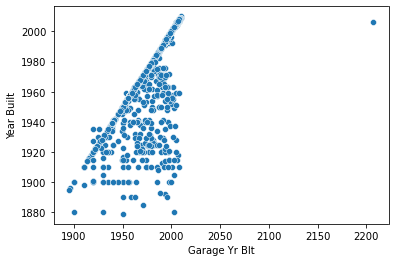

In [50]:
sns.scatterplot(data=df_clean,x='Garage Yr Blt',y='Year Built');

In [51]:
df_clean.head()

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Garage Yr Blt,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood
0,109,130500,6,Gd,1976,2005,2010,725.0,1479,2,6,2.0,1976.0,Ex,Y,SBrkr,0,CBlock,2Story,Sawyer
1,544,220000,7,Gd,1996,1997,2009,913.0,2122,2,8,2.0,1997.0,Ex,Y,SBrkr,1,PConc,2Story,SawyerW
2,153,109000,5,TA,1953,2007,2010,1057.0,1057,1,5,1.0,1953.0,TA,Y,SBrkr,0,CBlock,1Story,NAmes
3,318,174000,5,TA,2006,2007,2010,384.0,1444,2,7,2.0,2007.0,Gd,Y,SBrkr,0,PConc,2Story,Timber
4,255,138500,6,TA,1900,1993,2010,676.0,1445,2,6,2.0,1957.0,TA,Y,SBrkr,0,PConc,1.5Fin,SawyerW


In [52]:
df_clean.loc[df_clean['Garage Cars'].isna()]

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Garage Yr Blt,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood
1712,2237,150909,5,TA,1923,1999,2007,859.0,1828,2,6,NaN,NaN,Ex,Y,SBrkr,0,BrkTil,2Story,IDOTRR


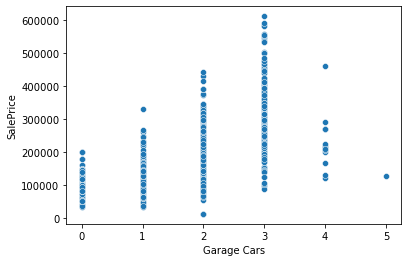

In [53]:
sns.scatterplot(data=df_clean,x='Garage Cars',y='SalePrice');

In [54]:
df_clean = df_clean.loc[df_clean['Garage Cars'] < 5]

In [55]:
df_clean.isna().sum()

Id                  0
SalePrice           0
Overall Qual        0
Exter Qual          0
Year Built          0
Year Remod/Add      0
Yr Sold             0
Total Bsmt SF       1
Gr Liv Area         0
Full Bath           0
TotRms AbvGrd       0
Garage Cars         0
Garage Yr Blt     113
Heating QC          0
Central Air         0
Electrical          0
Fireplaces          0
Foundation          0
House Style         0
Neighborhood        0
dtype: int64

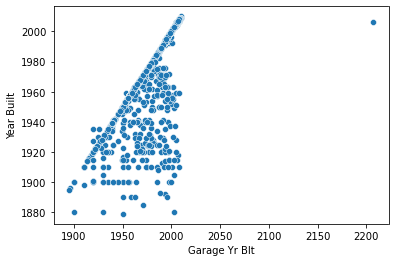

In [56]:
sns.scatterplot(data=df_clean,x='Garage Yr Blt',y='Year Built');

In [57]:
df_clean.loc[df_clean['Garage Yr Blt']>=2014]

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Garage Yr Blt,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood
1699,2261,267300,8,Gd,2006,2007,2007,1546.0,1564,2,6,2.0,2207.0,Ex,Y,SBrkr,1,PConc,1Story,Timber


In [58]:
df_clean = df_clean.drop(columns={'Garage Yr Blt'})
df_clean.head()

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood
0,109,130500,6,Gd,1976,2005,2010,725.0,1479,2,6,2.0,Ex,Y,SBrkr,0,CBlock,2Story,Sawyer
1,544,220000,7,Gd,1996,1997,2009,913.0,2122,2,8,2.0,Ex,Y,SBrkr,1,PConc,2Story,SawyerW
2,153,109000,5,TA,1953,2007,2010,1057.0,1057,1,5,1.0,TA,Y,SBrkr,0,CBlock,1Story,NAmes
3,318,174000,5,TA,2006,2007,2010,384.0,1444,2,7,2.0,Gd,Y,SBrkr,0,PConc,2Story,Timber
4,255,138500,6,TA,1900,1993,2010,676.0,1445,2,6,2.0,TA,Y,SBrkr,0,PConc,1.5Fin,SawyerW


In [59]:

df_clean = df_clean.loc[df_clean['Gr Liv Area']<3819]

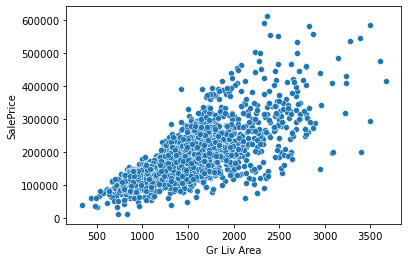

In [60]:
sns.scatterplot(data=df_clean,x='Gr Liv Area', y='SalePrice');

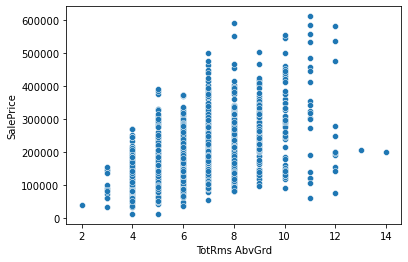

In [61]:
sns.scatterplot(data=df_clean,x='TotRms AbvGrd', y='SalePrice');

In [62]:
df_clean['Overall Qual'].describe()

count    2046.000000
mean        6.109971
std         1.422188
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64

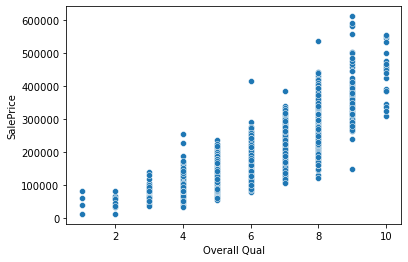

In [63]:
sns.scatterplot(data=df_clean,x='Overall Qual',y='SalePrice');

In [64]:
df_clean['topqual'] = df_clean['Overall Qual'] >= 7

df_clean['topqual'] = df_clean['topqual'].astype(int)

A new binary variable that determines whether or not a homes overall quality is in the top 75% percentile.

In [65]:
df_clean.head()

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood,topqual
0,109,130500,6,Gd,1976,2005,2010,725.0,1479,2,6,2.0,Ex,Y,SBrkr,0,CBlock,2Story,Sawyer,0
1,544,220000,7,Gd,1996,1997,2009,913.0,2122,2,8,2.0,Ex,Y,SBrkr,1,PConc,2Story,SawyerW,1
2,153,109000,5,TA,1953,2007,2010,1057.0,1057,1,5,1.0,TA,Y,SBrkr,0,CBlock,1Story,NAmes,0
3,318,174000,5,TA,2006,2007,2010,384.0,1444,2,7,2.0,Gd,Y,SBrkr,0,PConc,2Story,Timber,0
4,255,138500,6,TA,1900,1993,2010,676.0,1445,2,6,2.0,TA,Y,SBrkr,0,PConc,1.5Fin,SawyerW,0


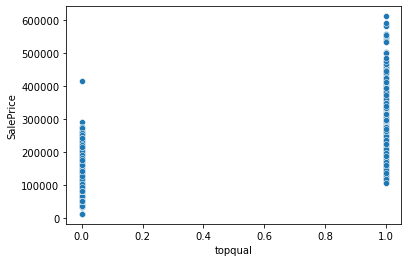

In [66]:
sns.scatterplot(data=df_clean,x='topqual',y='SalePrice');

In [67]:
df_clean.loc[(df_clean['SalePrice']>400_000) & (df_clean['topqual']==0)]

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood,topqual
1897,2738,415000,6,TA,1935,1990,2006,1836.0,3672,3,7,2.0,Gd,Y,SBrkr,2,BrkTil,2.5Unf,Edwards,0


In [68]:
df_clean.loc[df_clean['SalePrice']>=399_000]

,Id,SalePrice,Overall Qual,Exter Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood,topqual
41,2383,465000,10,Ex,2006,2006,2006,2076.0,2076,2,7,3.0,Ex,Y,SBrkr,1,PConc,1Story,NridgHt,1
81,367,501837,9,Ex,2008,2009,2009,2216.0,2234,2,9,3.0,Ex,Y,SBrkr,1,PConc,1Story,StoneBr,1
138,2331,545224,10,Ex,2006,2006,2006,1528.0,3390,3,10,3.0,Ex,Y,SBrkr,1,PConc,2Story,StoneBr,1
151,2333,556581,9,Gd,2005,2006,2006,1992.0,2868,3,11,3.0,Ex,Y,SBrkr,1,PConc,2Story,StoneBr,1
190,2330,457347,9,Gd,2005,2006,2006,1398.0,2798,3,11,3.0,Ex,Y,SBrkr,1,PConc,2Story,StoneBr,1
286,960,410000,9,Ex,2008,2008,2009,2190.0,2036,2,9,3.0,Ex,Y,SBrkr,1,CBlock,1Story,Timber,1
328,1773,430000,8,Gd,1992,1993,2007,3200.0,3228,3,10,2.0,Ex,Y,SBrkr,1,PConc,1Story,NoRidge,1
332,1060,460000,10,Ex,2005,2006,2008,1620.0,2790,2,10,4.0,Ex,Y,SBrkr,1,PConc,2Story,NridgHt,1
361,1701,418000,9,Gd,2005,2006,2007,1704.0,2758,2,9,3.0,Ex,Y,SBrkr,1,PConc,2Story,NridgHt,1
465,1765,410000,9,Gd,1998,1998,2007,1408.0,3078,2,9,3.0,Ex,Y,SBrkr,1,PConc,2Story,NoRidge,1


In [69]:
df_clean.shape

(2046, 20)

In [70]:
df_clean = df_clean.drop(index=1897)
df_clean.shape

(2045, 20)

Removing another outlier

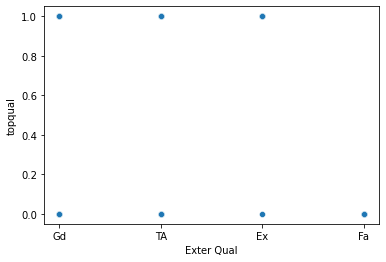

In [71]:
sns.scatterplot(data=df_clean,x='Exter Qual',y='topqual');

In [72]:
df_clean['Exter Qual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [73]:
df_clean = df_clean.drop(columns={'Exter Qual'})
df_clean.shape

(2045, 19)

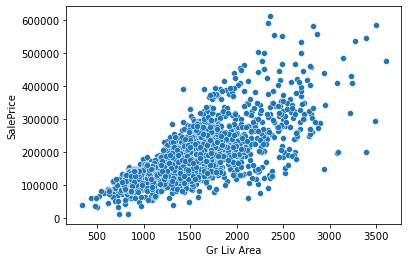

In [74]:
sns.scatterplot(data=df_clean,x='Gr Liv Area',y='SalePrice');

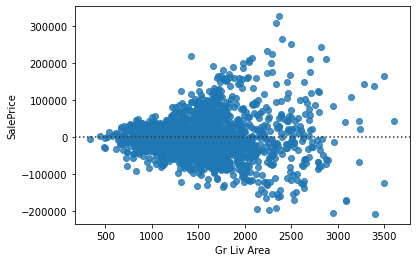

In [75]:
sns.residplot(data=df_clean,x='Gr Liv Area',y='SalePrice');

This variable is displaying stong heteroscedasticity.

In [76]:
df_clean['ppers'] = df_clean['SalePrice'] / df_clean['Gr Liv Area']

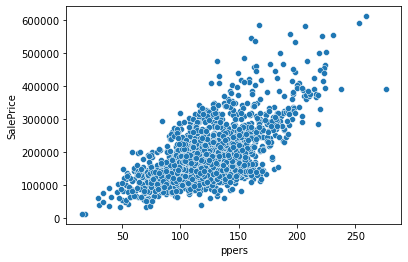

In [77]:
sns.scatterplot(data=df_clean,x='ppers',y='SalePrice');

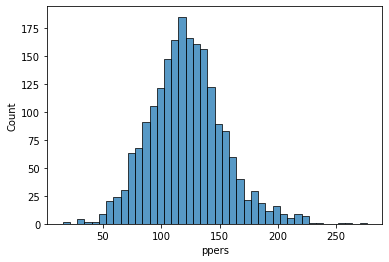

In [78]:
sns.histplot(data=df_clean['ppers']);

In [79]:
df_clean['var'] = np.log(df_clean['Gr Liv Area'] / df_clean['TotRms AbvGrd'])

Log of formula shows slightly more linear relationship to Sale Price

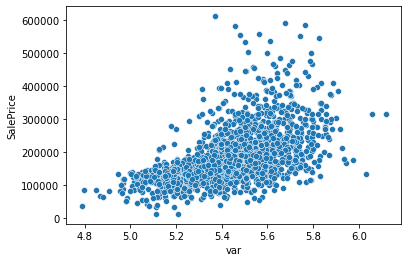

In [80]:
sns.scatterplot(data=df_clean,x='var',y='SalePrice');

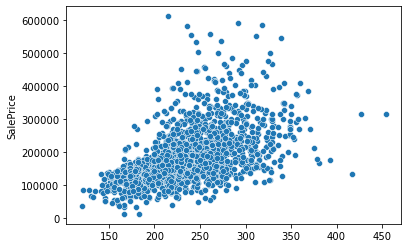

In [81]:
sns.scatterplot(x=df_clean['Gr Liv Area']/df_clean['TotRms AbvGrd'],y=df_clean['SalePrice']);

In [82]:
df_clean.head()

,Id,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood,topqual,ppers,var
0,109,130500,6,1976,2005,2010,725.0,1479,2,6,2.0,Ex,Y,SBrkr,0,CBlock,2Story,Sawyer,0,88.235294,5.507362
1,544,220000,7,1996,1997,2009,913.0,2122,2,8,2.0,Ex,Y,SBrkr,1,PConc,2Story,SawyerW,1,103.675778,5.580673
2,153,109000,5,1953,2007,2010,1057.0,1057,1,5,1.0,TA,Y,SBrkr,0,CBlock,1Story,NAmes,0,103.122044,5.353752
3,318,174000,5,2006,2007,2010,384.0,1444,2,7,2.0,Gd,Y,SBrkr,0,PConc,2Story,Timber,0,120.498615,5.329262
4,255,138500,6,1900,1993,2010,676.0,1445,2,6,2.0,TA,Y,SBrkr,0,PConc,1.5Fin,SawyerW,0,95.847751,5.484105


In [83]:
df_clean.rename(columns={'var':'rooms_per_sq_score','ppers':'price_per_squareft'},inplace=True)

In [84]:
df_clean['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    139
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     75
Crawfor     71
IDOTRR      68
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [85]:
hoods.sort_values('SalePrice',ascending=False)

,SalePrice
Neighborhood,
StoneBr,329675.736842
NridgHt,322831.352459
NoRidge,316294.125000
GrnHill,280000.000000
Veenker,253570.588235
Timber,241051.354167
Somerst,227183.900000
ClearCr,217490.074074
Crawfor,205901.211268


In [86]:
df_clean['tophoods'] = df_clean['Neighborhood'].map({'StoneBr':4,'NridgHt':4,'NoRidge':4,'GrnHill':4,'Veenker':4,'Timber':4,'Somerst':4,
                                                     'ClearCr':3,'Crawfor':3,'CollgCr':3,'Blmngtn':3,'NWAmes':3,'Gilbert':3,'Greens':3,
                                                    'SawyerW':2,'Mitchel':2,'NAmes':2,'Blueste':2,'NPkVill':2,'Sawyer':2,'Landmrk':2,
                                                    'SWISU':1,'Edwards':1,'BrkSide':1,'OldTown':1,'BrDale':1,'IDOTRR':1,'MeadowV':1})

New Int variable ranking neighborhoods by how expensive they are. They fit evenly into quartiles.

In [87]:
df_clean['tophoods'].value_counts()

2    614
1    520
3    506
4    405
Name: tophoods, dtype: int64

In [88]:
df_clean.head(1)

,Id,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood,topqual,price_per_squareft,rooms_per_sq_score,tophoods
0,109,130500,6,1976,2005,2010,725.0,1479,2,6,2.0,Ex,Y,SBrkr,0,CBlock,2Story,Sawyer,0,88.235294,5.507362,2


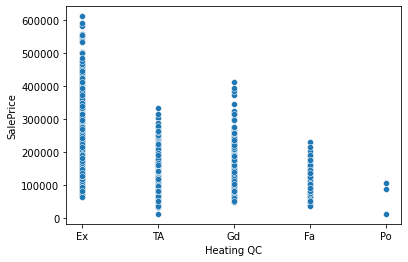

In [89]:
sns.scatterplot(data=df_clean,x='Heating QC',y='SalePrice');

In [90]:
df_clean['Central Air'] = df_clean['Central Air'].map({'Y':1,'N':0})

Binarizing Central A/C

In [91]:
df_clean.head(1)

,Id,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Heating QC,Central Air,Electrical,Fireplaces,Foundation,House Style,Neighborhood,topqual,price_per_squareft,rooms_per_sq_score,tophoods
0,109,130500,6,1976,2005,2010,725.0,1479,2,6,2.0,Ex,1,SBrkr,0,CBlock,2Story,Sawyer,0,88.235294,5.507362,2


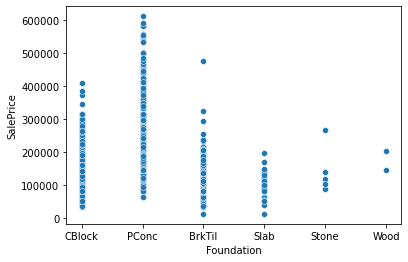

In [92]:
sns.scatterplot(data=df_clean,x='Foundation',y='SalePrice');

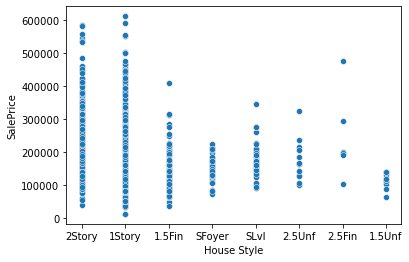

In [93]:
sns.scatterplot(data=df_clean,x='House Style',y='SalePrice');

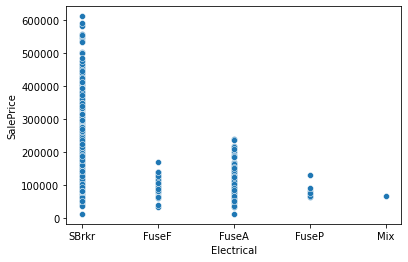

In [94]:
sns.scatterplot(data=df_clean,x='Electrical',y='SalePrice');

In [95]:
df_clean['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [96]:
df_clean['good_elec'] = df_clean['Electrical'].map({'SBrkr':1,'FuseF':0,'FuseA':0, 'FuseP':0, 'Mix':0})

Is the electrical standard breakers or not?

In [97]:
df_clean.drop(columns={'Foundation','House Style'},inplace=True)
df_clean.head()

,Id,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Heating QC,Central Air,Electrical,Fireplaces,Neighborhood,topqual,price_per_squareft,rooms_per_sq_score,tophoods,good_elec
0,109,130500,6,1976,2005,2010,725.0,1479,2,6,2.0,Ex,1,SBrkr,0,Sawyer,0,88.235294,5.507362,2,1
1,544,220000,7,1996,1997,2009,913.0,2122,2,8,2.0,Ex,1,SBrkr,1,SawyerW,1,103.675778,5.580673,2,1
2,153,109000,5,1953,2007,2010,1057.0,1057,1,5,1.0,TA,1,SBrkr,0,NAmes,0,103.122044,5.353752,2,1
3,318,174000,5,2006,2007,2010,384.0,1444,2,7,2.0,Gd,1,SBrkr,0,Timber,0,120.498615,5.329262,4,1
4,255,138500,6,1900,1993,2010,676.0,1445,2,6,2.0,TA,1,SBrkr,0,SawyerW,0,95.847751,5.484105,2,1


Foundation could be hard for some homeowner's to indentify, house style is a little all over the place.

In [98]:
df_clean = pd.get_dummies(df_clean, columns = ['Heating QC'],drop_first=True)

Dummying heating quality based on the Excellent score

In [99]:
df_clean.head()

,Id,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Central Air,Electrical,Fireplaces,Neighborhood,topqual,price_per_squareft,rooms_per_sq_score,tophoods,good_elec,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA
0,109,130500,6,1976,2005,2010,725.0,1479,2,6,2.0,1,SBrkr,0,Sawyer,0,88.235294,5.507362,2,1,0,0,0,0
1,544,220000,7,1996,1997,2009,913.0,2122,2,8,2.0,1,SBrkr,1,SawyerW,1,103.675778,5.580673,2,1,0,0,0,0
2,153,109000,5,1953,2007,2010,1057.0,1057,1,5,1.0,1,SBrkr,0,NAmes,0,103.122044,5.353752,2,1,0,0,0,1
3,318,174000,5,2006,2007,2010,384.0,1444,2,7,2.0,1,SBrkr,0,Timber,0,120.498615,5.329262,4,1,0,1,0,0
4,255,138500,6,1900,1993,2010,676.0,1445,2,6,2.0,1,SBrkr,0,SawyerW,0,95.847751,5.484105,2,1,0,0,0,1


In [100]:
df_clean['newness'] = np.where(df_clean['Year Remod/Add'] > df_clean['Year Built'], 
                               df_clean['Yr Sold'] - df_clean['Year Remod/Add'], 
                               df_clean['Yr Sold'] - df_clean['Year Built'])
df_clean.head()

,Id,SalePrice,Overall Qual,Year Built,Year Remod/Add,Yr Sold,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Central Air,Electrical,Fireplaces,Neighborhood,topqual,price_per_squareft,rooms_per_sq_score,tophoods,good_elec,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,newness
0,109,130500,6,1976,2005,2010,725.0,1479,2,6,2.0,1,SBrkr,0,Sawyer,0,88.235294,5.507362,2,1,0,0,0,0,5
1,544,220000,7,1996,1997,2009,913.0,2122,2,8,2.0,1,SBrkr,1,SawyerW,1,103.675778,5.580673,2,1,0,0,0,0,12
2,153,109000,5,1953,2007,2010,1057.0,1057,1,5,1.0,1,SBrkr,0,NAmes,0,103.122044,5.353752,2,1,0,0,0,1,3
3,318,174000,5,2006,2007,2010,384.0,1444,2,7,2.0,1,SBrkr,0,Timber,0,120.498615,5.329262,4,1,0,1,0,0,3
4,255,138500,6,1900,1993,2010,676.0,1445,2,6,2.0,1,SBrkr,0,SawyerW,0,95.847751,5.484105,2,1,0,0,0,1,17


Calculate how new a house is based on it's most recent construction event before sale. 

In [101]:
df_clean.columns

Index(['Id', 'SalePrice', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Yr Sold', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd',
       'Garage Cars', 'Central Air', 'Electrical', 'Fireplaces',
       'Neighborhood', 'topqual', 'price_per_squareft', 'rooms_per_sq_score',
       'tophoods', 'good_elec', 'Heating QC_Fa', 'Heating QC_Gd',
       'Heating QC_Po', 'Heating QC_TA', 'newness'],
      dtype='object')

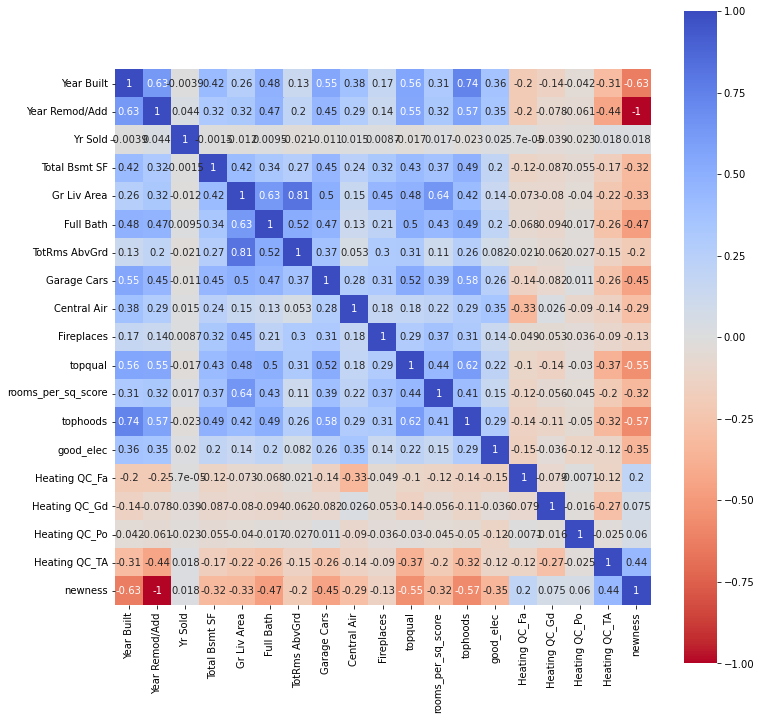

In [102]:
plt.figure(figsize=(12,12))
sns.heatmap(df_clean.drop(columns={'Id','SalePrice','price_per_squareft','Overall Qual'}).corr(),vmin=-1,vmax=1,annot=True,square=True,cmap='coolwarm_r');

In [103]:
df_clean = df_clean.drop(columns={'Year Built', 'Year Remod/Add', 'Yr Sold'})

Checking for any standouts, too strong multicollinearity with the dates and newness. They become redundant anyways.

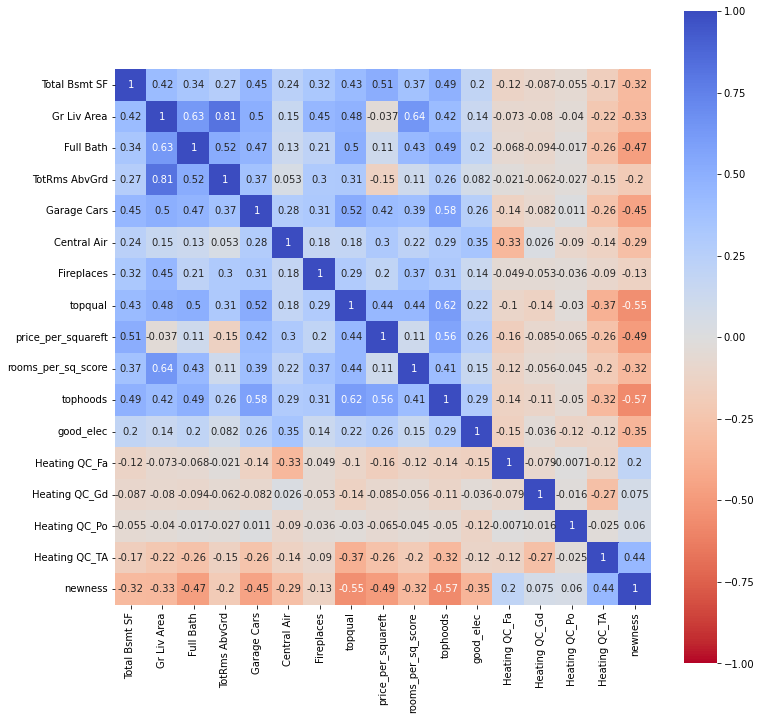

In [104]:
plt.figure(figsize=(12,12))
sns.heatmap(df_clean.drop(columns={'Id','SalePrice','Overall Qual'}).corr(),vmin=-1,vmax=1,annot=True,square=True,cmap='coolwarm_r');

In [105]:
df_clean.head()

,Id,SalePrice,Overall Qual,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Central Air,Electrical,Fireplaces,Neighborhood,topqual,price_per_squareft,rooms_per_sq_score,tophoods,good_elec,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,newness
0,109,130500,6,725.0,1479,2,6,2.0,1,SBrkr,0,Sawyer,0,88.235294,5.507362,2,1,0,0,0,0,5
1,544,220000,7,913.0,2122,2,8,2.0,1,SBrkr,1,SawyerW,1,103.675778,5.580673,2,1,0,0,0,0,12
2,153,109000,5,1057.0,1057,1,5,1.0,1,SBrkr,0,NAmes,0,103.122044,5.353752,2,1,0,0,0,1,3
3,318,174000,5,384.0,1444,2,7,2.0,1,SBrkr,0,Timber,0,120.498615,5.329262,4,1,0,1,0,0,3
4,255,138500,6,676.0,1445,2,6,2.0,1,SBrkr,0,SawyerW,0,95.847751,5.484105,2,1,0,0,0,1,17


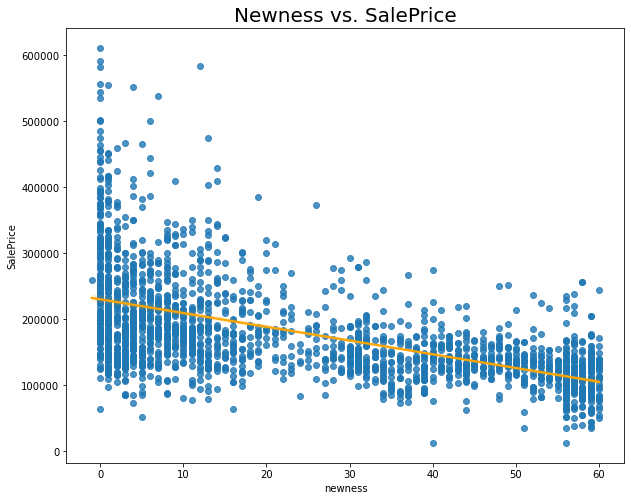

In [112]:
plt.figure(figsize=(10,8))
sns.regplot(data=df_clean,x='newness',y='SalePrice',line_kws={'color':'orange'});
plt.title('Newness vs. SalePrice', size=20);

In [116]:
df_clean = df_clean.dropna()

In [117]:
df_clean.isna().sum()

Id                    0
SalePrice             0
Overall Qual          0
Total Bsmt SF         0
Gr Liv Area           0
Full Bath             0
TotRms AbvGrd         0
Garage Cars           0
Central Air           0
Electrical            0
Fireplaces            0
Neighborhood          0
topqual               0
price_per_squareft    0
rooms_per_sq_score    0
tophoods              0
good_elec             0
Heating QC_Fa         0
Heating QC_Gd         0
Heating QC_Po         0
Heating QC_TA         0
newness               0
dtype: int64

In [118]:
df_clean.to_csv('../datasets/train_clean.csv',index=False)